In [1]:
#### You code here

#Importing required modules

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from datetime import date

In [2]:
df_birth = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/births.csv")

quartiles = np.percentile(df_birth['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
df_birth = df_birth.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
df_birth['date'] = pd.to_datetime(df_birth[['year', 'month', 'day']])

In [3]:
df_birth_freq = df_birth.groupby('date').mean()['births'].reset_index().rename(columns={'births':'avg_birth_rate'})

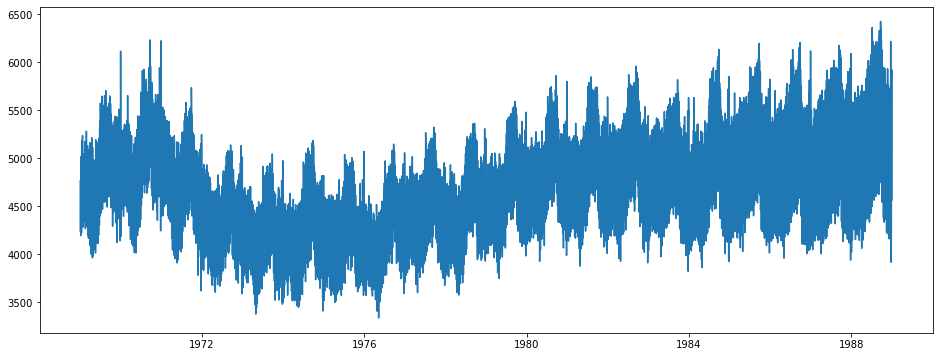

In [4]:
fig, ax = plt.subplots(figsize=(16, 6))
style = dict(size=10, color='gray')
plt.plot(df_birth_freq['date'], df_birth_freq['avg_birth_rate'])